<a href="https://colab.research.google.com/github/zjzsu2000/CMPE258/blob/master/Ungraded_assignment_3/Ungraded_assignment_3_Week1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Import Packages

In [0]:
%pip install h5py
import numpy as np
import matplotlib.pyplot as plt
import h5py
import scipy
from PIL import Image
from scipy import ndimage

%matplotlib inline

##Mount Google Drive

In [0]:
from google.colab import drive
drive.mount('/content/drive')


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
root_dir = '/content/drive/My Drive/'
base_dir = root_dir + 'CMPE258/assignment/'
data_dir_me=base_dir+'data/'

##Load the dataset

In [0]:
train_path = data_dir_me + 'train_catvnoncat.h5'
test_path = data_dir_me + 'test_catvnoncat.h5'

In [0]:
train_data = h5py.File(train_path, "r")

test_data = h5py.File(test_path, "r")


In [0]:
train_set_X = np.array(train_data["train_set_x"][:]) 
train_set_y = np.array(train_data["train_set_y"][:]) 
 
test_set_X = np.array(test_data["test_set_x"][:])
test_set_y = np.array(test_data["test_set_y"][:]) 
 
classes_map = np.array(test_data["list_classes"][:]) 
 
#reshape 
train_set_y = train_set_y.reshape((1, train_set_y.shape[0]))
test_set_y = test_set_y.reshape((1, test_set_y.shape[0]))

In [0]:
classes_map

array([b'non-cat', b'cat'], dtype='|S7')

In [0]:
train_set_X[0]

array([[[17, 31, 56],
        [22, 33, 59],
        [25, 35, 62],
        ...,
        [ 1, 28, 57],
        [ 1, 26, 56],
        [ 1, 22, 51]],

       [[25, 36, 62],
        [28, 38, 64],
        [30, 40, 67],
        ...,
        [ 1, 27, 56],
        [ 1, 25, 55],
        [ 2, 21, 51]],

       [[32, 40, 67],
        [34, 42, 69],
        [35, 42, 70],
        ...,
        [ 1, 25, 55],
        [ 0, 24, 54],
        [ 1, 21, 51]],

       ...,

       [[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]],

       [[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]],

       [[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]]], dtype=uint8)

In [0]:
train_set_y[0]

array([0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0])

y = [0], it's a 'non-cat' picture.


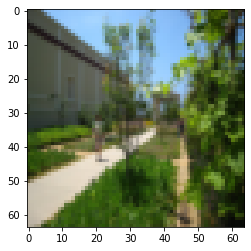

In [0]:
# plot the  picture
plt.imshow(train_set_X[8])
print ("y = " + str(train_set_y[:, 8]) + ", it's a '" + classes_map[np.squeeze(train_set_y[:, 8])].decode("utf-8") +  "' picture.")

In [0]:
train_set_X.shape

(209, 64, 64, 3)

In [0]:
test_set_X.shape

(50, 64, 64, 3)

In [0]:
num_train = train_set_X.shape[0]
num_test = test_set_X.shape[0]
num_pixel = train_set_X.shape[1]


In [0]:
print ("Dataset Summary:")
print ("# of training data:" ,num_train)
print ("# of testing data: " , num_test)
print ("Each image shape: (" + str(num_pixel) + ", " + str(num_pixel) + ", 3)")

Dataset Summary:
# of training data: 209
# of testing data:  50
Each image shape: (64, 64, 3)


##Reshape to flatten

In [0]:
train_set_X = train_set_X.reshape(train_set_X.shape[0], -1).T
test_set_X = test_set_X.reshape(test_set_X.shape[0], -1).T 


print ("train_set_X new shape: " , train_set_X.shape)
print ("train_set_y new shape: " , train_set_y.shape)
print ("test_set_X new shape: " , test_set_X.shape)
print ("test_set_y new shape: " , test_set_y.shape)


train_set_X new shape:  (12288, 209)
train_set_y new shape:  (1, 209)
test_set_X new shape:  (12288, 50)
test_set_y new shape:  (1, 50)


###Scaling

In [0]:
train_set_X = train_set_X/255.
test_set_X = test_set_X/255.

##Logistic Regression

In [0]:
def sigmoid(input_x):
    sigmoid_output = 1 / (1 + (np.exp(-input_x)))
    return sigmoid_output

In [0]:
sigmoid(np.array([0,8]))

array([0.5       , 0.99966465])

In [0]:
#function: initialize_with_zeros

def initialize_with_zeros(dim_size):
    w = np.zeros((dim_size, 1))
    b = 0
    assert(w.shape == (dim_size, 1))
    assert(isinstance(b, float) or isinstance(b, int))
    return w, b

In [0]:
dim_size = 2
w, b = initialize_with_zeros(dim_size)

In [0]:
print (w)
print (b)

[[0.]
 [0.]]
0


##Forward and Backward propagation

In [0]:
#propagate

def propagate(w, b, X, Y):
    """
    w -- weights, a numpy array of size (num_px * num_px * 3, 1)
    b -- bias, a scalar
    X -- data of size (num_px * num_px * 3, number of examples)
    Y -- true "label" vector (containing 0 if non-cat, 1 if cat) of size (1, number of examples)

    Return:
    cost -- negative log-likelihood cost for logistic regression
    dw -- gradient of the loss with respect to w, thus same shape as w
    db -- gradient of the loss with respect to b, thus same shape as b
     
    """
    m = X.shape[1]
    
    # FORWARD PROPAGATION (FROM X TO COST)
    A = sigmoid(np.dot(w.T, X) + b)                                  # compute activation
    cost_init = np.multiply(Y, np.log(A)) + np.multiply((1 - Y), np.log(1 - A))
    cost = -np.sum(cost_init, axis=1, keepdims=True) / m                               # compute cost

    # BACKWARD PROPAGATION (TO FIND GRAD)
    dw = np.dot(X, (A - Y).T) / m
    db = np.sum((A - Y), axis=1, keepdims=True) / m

    assert(dw.shape == w.shape)
    assert(db.dtype == float)
    cost = np.squeeze(cost)
    assert(cost.shape == ())
    
    grads = {"dw": dw, "db": db}
    return grads, cost

In [0]:
w, b, X, Y = np.array([[1.],[2.]]), 2., np.array([[1.,2.,-1.],[3.,4.,-3.2]]), np.array([[1,0,1]])
grads, cost = propagate(w, b, X, Y)
print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))
print ("cost = " + str(cost))

dw = [[0.99845601]
 [2.39507239]]
db = [[0.00145558]]
cost = 5.801545319394553


## Optimization function

In [0]:
#optimize

def optimize(w, b, X, Y, num_iterations, learning_rate, print_cost = False):
    """
    Input:
    w -- weights, a numpy array of size (num_px * num_px * 3, 1)
    b -- bias, a scalar
    X -- data of shape (num_px * num_px * 3, number of examples)
    Y -- true "label" vector (containing 0 if non-cat, 1 if cat), of shape (1, number of examples)
    num_iterations -- number of iterations of the optimization loop
    learning_rate -- learning rate of the gradient descent update rule
    print_cost -- True to print the loss every 100 steps
    
    Returns:
    params -- dictionary containing the weights w and bias b
    grads -- dictionary containing the gradients of the weights and bias with respect to the cost function
    costs -- list of all the costs computed during the optimization, this will be used to plot the learning curve.
    """
    
    costs = []
    
    for i in range(num_iterations):
        
        # Cost and gradient calculation (≈ 1-4 lines of code)
        grads, cost = propagate(w, b, X, Y)
              
        # Retrieve derivatives from grads
        dw = grads["dw"]
        db = grads["db"]
        
        # update rule (≈ 2 lines of code)
        w = w - (learning_rate * dw)
        b = b - (learning_rate * db)
              
        # Record the costs
        if i % 100 == 0:
            costs.append(cost)
        
        # Print the cost every 100 training iterations
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
    
    params = {"w": w, "b": b}
    
    grads = {"dw": dw, "db": db}
    
    return params, grads, costs

In [0]:
params, grads, costs = optimize(w, b, X, Y, num_iterations= 100, learning_rate = 0.009, print_cost = False)

print ("w = " + str(params["w"]))
print ("b = " + str(params["b"]))
print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))

w = [[0.19033591]
 [0.12259159]]
b = [[1.92535983]]
dw = [[0.67752042]
 [1.41625495]]
db = [[0.2191945]]


##Predict function


In [0]:
def prediction(w, b, X):
       
    m = X.shape[1]
    Y_prediction = np.zeros((1,m))
    w = w.reshape(X.shape[0], 1)

    A = sigmoid(np.dot(w.T, X) + b)    
    for i in range(A.shape[1]):            
        if A[0][i] > 0.5:
            Y_prediction[0][i] = 1
        else:
            Y_prediction[0][i] = 0
        pass    
    
    assert(Y_prediction.shape == (1, m))
    
    return Y_prediction

In [0]:
w = np.array([[0.1124579],[0.23106775]])
b = -0.3
X = np.array([[1.,-1.1,-3.2],[1.2,2.,0.1]])
print (prediction(w, b, X))

[[1. 1. 0.]]


# Merge all functions into a model

In [0]:
def create_model(X_train, Y_train, X_test, Y_test, num_iterations = 2000, learning_rate = 0.5, print_cost = False):       
    w, b = np.zeros((X_train.shape[0], 1)), 0
 
    parameters, grads, costs = optimize(w, b, X_train, Y_train, num_iterations, learning_rate, print_cost)
    
    w = parameters["w"]
    b = parameters["b"]

    Y_prediction_test = prediction(w, b, X_test)
    Y_prediction_train = prediction(w, b, X_train)
    
    print("training accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
    print("testing accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))

    
    summary = {"costs": costs,"Y_prediction_test": Y_prediction_test, 
         "Y_prediction_train" : Y_prediction_train, 
         "w" : w,  "b" : b, "learning_rate" : learning_rate,
         "num_iterations": num_iterations}
    
    return summary

Training

In [0]:
model = create_model(train_set_X, train_set_y, test_set_X, test_set_y, num_iterations = 2000, learning_rate = 0.005, print_cost = True)

Cost after iteration 0: 0.693147
Cost after iteration 100: 0.584508
Cost after iteration 200: 0.466949
Cost after iteration 300: 0.376007
Cost after iteration 400: 0.331463
Cost after iteration 500: 0.303273
Cost after iteration 600: 0.279880
Cost after iteration 700: 0.260042
Cost after iteration 800: 0.242941
Cost after iteration 900: 0.228004
Cost after iteration 1000: 0.214820
Cost after iteration 1100: 0.203078
Cost after iteration 1200: 0.192544
Cost after iteration 1300: 0.183033
Cost after iteration 1400: 0.174399
Cost after iteration 1500: 0.166521
Cost after iteration 1600: 0.159305
Cost after iteration 1700: 0.152667
Cost after iteration 1800: 0.146542
Cost after iteration 1900: 0.140872
training accuracy: 99.04306220095694 %
testing accuracy: 70.0 %


## Plot learning rate curve (with costs)

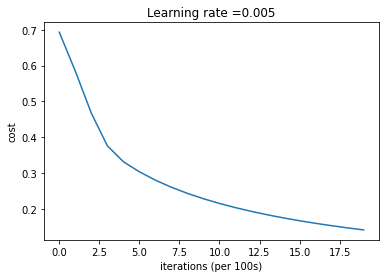

In [0]:
costs = np.squeeze(model['costs'])
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per 100s)')
plt.title("Learning rate =" +str(model['learning_rate']))
plt.show()